# Sales Forecast Using ARIMA
Auto Regressive Integrated Moving Averages

In [159]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [160]:
salesdata_import = pd.read_csv(r'C:\Users\admin_mab\Desktop\Data Science Project\Sales Forecast\ARIMA algorithm\SalesReport.csv')

In [161]:
salesdata_import.head()
#salesdata_import.dtypes

,SalesOrder,InvoiceAccount,InvoiceNo,InvoiceDate,ItemId,QTY,UnitPrice,BasicVal,Discount,NetVal
0,IN1S147747,IN1C105413,UT-03041-18-19,2019/01,1334007,50,782,"39,100.00",0,39100.0
1,IN1S147747,IN1C105413,UT-03041-18-19,2019/01,1046001,500,32,"16,000.00",0,16000.0
2,IN1S148167,IN1C105413,UT-03039-18-19,2019/01,1172010,140,272,"38,080.00",0,38080.0
3,IN1S148504,IN1C106015,GW-00009-18-19,2019/01,1172010,258,263,"67,854.00",0,67854.0
4,IN1S148504,IN1C106015,GW-00008-18-19,2019/01,1172010,382,263,"100,466.00",0,100466.0


In [162]:
sales_dump = salesdata_import[['InvoiceDate','NetVal']]
#sales_dump.astype({'InvoiceDate': 'datetime64[ns]'}).dtypes
#sales_dump.astype({'NetVal': 'float16'}).dtypes
sales_dump['InvoiceDate'] = pd.to_datetime(sales_dump['InvoiceDate'])

<ipython-input-162-b582b94bc224>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_dump['InvoiceDate'] = pd.to_datetime(sales_dump['InvoiceDate'])


In [164]:
sales_dump = sales_dump.loc[sales_dump['NetVal'] > 0].groupby(['InvoiceDate']).sum()
#sales_dump.set_index('InvoiceDate',inplace=True)

In [165]:
sales_dump = sales_dump.sort_values("InvoiceDate", ascending = True)
sales_dump.head()

,NetVal
InvoiceDate,
2019-01-01,5.835817e+08
2019-02-01,5.690904e+08
2019-03-01,5.736342e+08
2019-04-01,5.215469e+08
2019-05-01,6.013392e+08


In [166]:
sales_dump.describe()

,NetVal
count,1.200000e+01
mean,5.425809e+08
std,4.677116e+07
min,4.779159e+08
25%,5.081325e+08
50%,5.510312e+08
75%,5.761211e+08
max,6.043807e+08


<AxesSubplot:xlabel='InvoiceDate'>

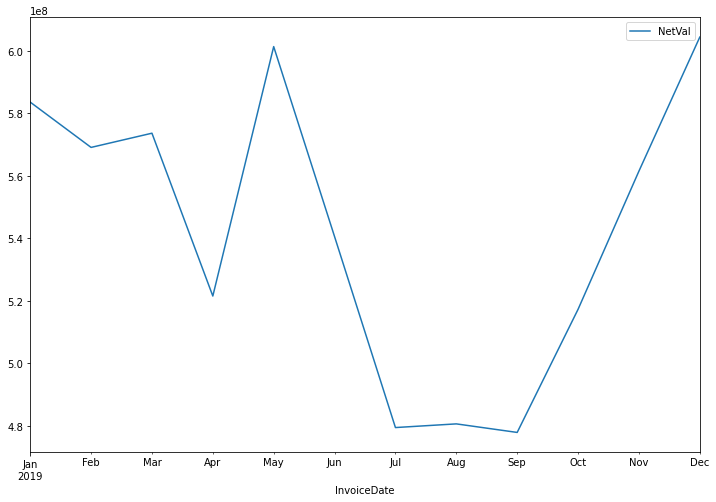

In [167]:
sales_dump.plot(figsize=(12,8))

Testing whether teh data is stationary

In [168]:
from statsmodels.tsa.stattools import adfuller

In [169]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [170]:
adfuller_test(sales_dump['NetVal'])

ADF Test Statistic : -5.689059379843001
p-value : 8.150758831566288e-07
#Lags Used : 4
Number of Observations Used : 7
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


# Auto Regressive Model
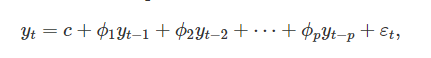
Final Thoughts on Autocorrelation and Partial Autocorrelation
Identification of an AR model is often best done with the PACF.
For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
Identification of an MA model is often best done with the ACF rather than the PACF.

For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.

p,d,q p AR model lags d differencing q MA lags

In [171]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

ValueError: could not broadcast input array from shape (12) into shape (41)

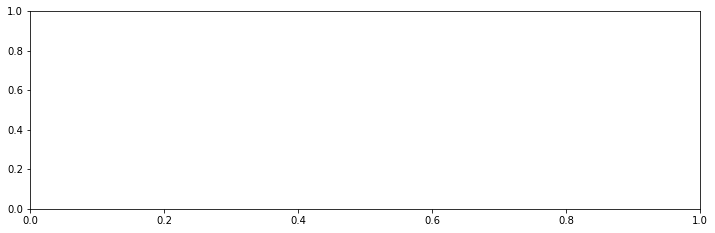

In [172]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sales_dump['NetVal'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sales_dump['NetVal'],lags=40,ax=ax2)

#p = 1 (because sudden shutdown in Partial AustoCorrelation), d= 0 (becauser no shifing) , q= 0 (because no exponential in autocoralatin)

In [173]:
# For non-seasonal data
#p=1, d=0, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [175]:
model=ARIMA(sales_dump['NetVal'],order=(1,1,2))
model_fit=model.fit()


C:\Users\admin_mab\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\admin_mab\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequen

ValueError: The model specification cannot be estimated. The model contains 7 regressors (0 trend, 0 seasonal, 7 lags) but after adjustment for hold_back and creation of the lags, there are only 4 data points available to estimate parameters.

In [176]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 NetVal   No. Observations:                  340
Model:                     ARMA(1, 1)   Log Likelihood               -5920.367
Method:                       css-mle   S.D. of innovations        8830418.687
Date:                Thu, 25 Feb 2021   AIC                          11848.733
Time:                        04:22:18   BIC                          11864.049
Sample:                             0   HQIC                         11854.836
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.915e+07   8.45e+05     22.654      0.000    1.75e+07    2.08e+07
ar.L1.NetVal     0.6837      0.108      6.327      0.000       0.472       0.896
ma.L1.NetVal    -0.4395      0.129     -3.395      0.001      -0.693      -0.186
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4626           +0.0000j            1.4626            0.0000
MA.1            2.2754           +0.0000j            2.2754            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='InvoiceDate'>

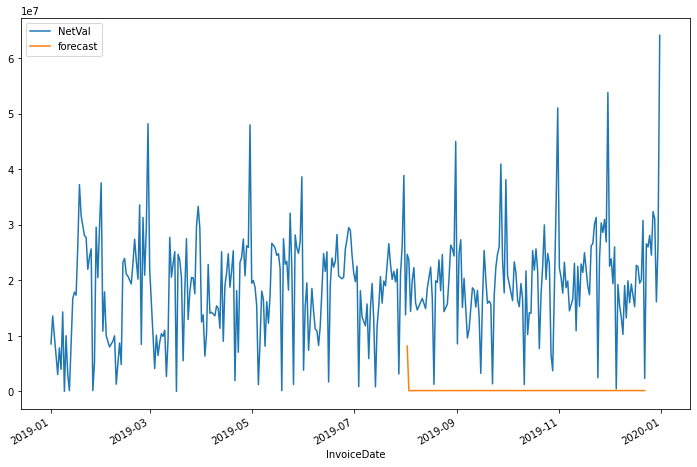

In [149]:
sales_dump['forecast']=model_fit.predict(start=200,end=330,dynamic=True)
sales_dump[['NetVal','forecast']].plot(figsize=(12,8))

In [73]:
import statsmodels.api as sm

In [101]:
model=sm.tsa.statespace.SARIMAX(sales_dump['NetVal'],order=(1, 0, 0),seasonal_order=(1,0,0,12))
results=model.fit()

C:\Users\admin_mab\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\admin_mab\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\admin_mab\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\admin_mab\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic 

<AxesSubplot:xlabel='InvoiceDate'>

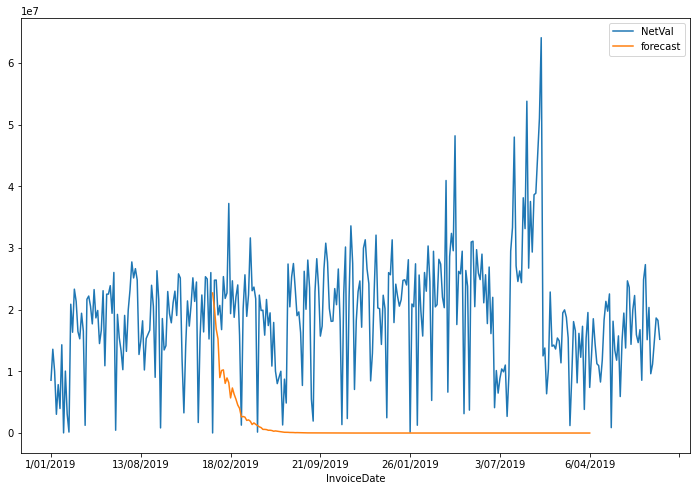

In [102]:
sales_dump['forecast']=results.predict(start=90,end=300,dynamic=True)
sales_dump[['NetVal','forecast']].plot(figsize=(12,8))